<a href="https://colab.research.google.com/github/Sreeja3207/AI-Driven-OSINT/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy tensorflow keras nltk matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np

# Sample social media posts dataset
data = {
    "timestamp": pd.date_range(start="2024-01-01", periods=100, freq="D"),
    "text": [
        "Massive phishing scam targeting bank customers reported.",
        "New ransomware variant spreading via email attachments.",
        "DDoS attack detected on a major government website.",
        "Fake cryptocurrency investment ads scamming users on Twitter.",
        "Malware disguised as a security update found on multiple devices.",
        "A botnet launching large-scale cyber attacks on corporate servers.",
        "Suspicious phishing emails pretending to be from PayPal detected.",
        "Social media phishing attack tricking users into entering credentials.",
        "New zero-day exploit discovered targeting mobile devices.",
        "Fake news articles spreading misinformation on cybersecurity.",
    ] * 10,  # Duplicate to create 100 samples
    "threat_score": np.random.randint(1, 10, 100),  # Threat intensity score (1-10)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv("social_media_threats.csv", index=False)

print("Dataset saved as 'social_media_threats.csv'")



Dataset saved as 'social_media_threats.csv'


In [ ]:
pd.read_csv("social_media_threats.csv")

,timestamp,text,threat_score
0,2024-01-01,Massive phishing scam targeting bank customers...,4
1,2024-01-02,New ransomware variant spreading via email att...,1
2,2024-01-03,DDoS attack detected on a major government web...,5
3,2024-01-04,Fake cryptocurrency investment ads scamming us...,7
4,2024-01-05,Malware disguised as a security update found o...,7
...,...,...,...
95,2024-04-05,A botnet launching large-scale cyber attacks o...,8
96,2024-04-06,Suspicious phishing emails pretending to be fr...,7
97,2024-04-07,Social media phishing attack tricking users in...,5
98,2024-04-08,New zero-day exploit discovered targeting mobi...,3


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re

# Load dataset
df = pd.read_csv("social_media_threats.csv")

# Text Preprocessing
nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in STOPWORDS])  # Remove stopwords
    return text

df["cleaned_text"] = df["text"].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_text"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])
padded_sequences = pad_sequences(sequences, maxlen=20, padding="post", truncating="post")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df["threat_score"], test_size=0.2, random_state=42
)

print("Preprocessing complete. Ready for LSTM training!")


Preprocessing complete. Ready for LSTM training!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=20),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation="relu"),
    Dense(1, activation="linear")  # Regression task (threat score)
])

# Compile model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("LSTM Model Training Completed!")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - loss: 30.5992 - mae: 5.0438 - val_loss: 25.0925 - val_mae: 4.1658
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 29.1431 - mae: 4.9124 - val_loss: 21.8625 - val_mae: 3.7586
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 23.5550 - mae: 4.2990 - val_loss: 17.2934 - val_mae: 3.2134
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.9014 - mae: 3.7266 - val_loss: 13.0309 - val_mae: 2.7704
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 13.2073 - mae: 3.0602 - val_loss: 10.5718 - val_mae: 2.5851
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.4887 - mae: 2.6498 - val_loss: 9.1502 - val_mae: 2.4996
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.8086 - mae: 2.4399 - val_loss: 8.2271 - val_mae: 2.4998
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.8928 - mae: 2.1843 - val_loss: 7.7938 - val_mae: 2.5165
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5.8691 - mae: 2.0264 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


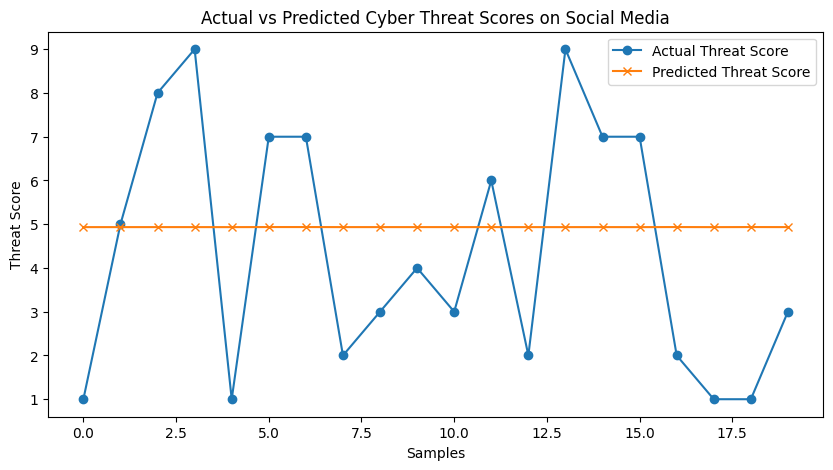

In [ ]:
import matplotlib.pyplot as plt

# Predict threat scores
predictions = model.predict(X_test)

# Plot actual vs. predicted threat scores
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Threat Score", marker="o")
plt.plot(predictions, label="Predicted Threat Score", marker="x")
plt.legend()
plt.title("Actual vs Predicted Cyber Threat Scores on Social Media")
plt.xlabel("Samples")
plt.ylabel("Threat Score")
plt.show()